# 6-2: Visualizing Spatial Data using ArcGIS API for Python

## 1. Introduction to the ArcGIS API for Python

- The ArcGIS API for Python, i.e., the `arcgis` package, is a powerful, modern and easy to use Pythonic library to perform GIS **visualization** and analysis, spatial data management and GIS system administration tasks that can run both in an interactive fashion, as well as using scripts.
- Shipped with the ArcGIS Pro installation file

Helpful resource on **arcgis**:
- [An overview of the API](https://developers.arcgis.com/python/guide/overview-of-the-arcgis-api-for-python/)
- [GitHub: ArcGIS API for Python](https://github.com/Esri/arcgis-python-api)

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/irpubkYLrWI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### 1.1 Import the package

In [1]:
import arcgis

In [2]:
from arcgis import GIS, GeoAccessor, GeoSeriesAccessor, pd

### 1.2 The _GIS_ class from the _gis_ module

- what is **class** in Python?
    + it is a blueprint for building things (a machine produces products)
    + things get created from the class are called objects (or instances of the class)
    + DRY (Don't repeat yourself) code. 
    + example:
        * a college student
        * a data structure that organizes the data -- _NumPy_ array and _pandas_ DataFrame
- what is **gis** (Geographic Information System)?
    + Geographic Data:
        * collection
        * storage
        * manipulation
        * analysis
        * visualization
        * management/administration
        * distribution
    + A variety of technologies:
        * human activities (such as conducting survey of a area of land)
        * hardware
        * software (a narrower definition of GIS)
- The **GIS** class
    + from the **gis** module (the core) of the _arcgis_ package 
    + a portal to do GIS
    + can link to an ArcGIS Online account
    + or, be used locally without the connection

## 2. Spatially Enabled DataFrame (SEDF)

### 2.1 What is SEDF

- A class from the _features_ module of _arcgis_ (`arcgis.features`)
    + contains types and functions for working with features and feature layers in the GIS.
- An extension of the `DataFrame` class from _pandas_
- we use ArcPy as the geometry engine for this module, which gives us access to all native GIS data ArcGIS Pro supports

### 2.2 Load a feature class as SEDF

In [1]:
from arcgis import pd, GeoAccessor, GeoSeriesAccessor
import arcpy

gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp
blkgrp_fc = "blockgroups"

In [4]:
blkgrp_sedf = pd.DataFrame.spatial.from_featureclass(blkgrp_fc)
blkgrp_sedf.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,...,DEN_NOTWEL,DEN_NOTATA,PCT_OWN5,PCT_RENT5,PCT_BACHLR,PCT_POV,PCT_RU1,DATAYEAR,DESCRIPT,SHAPE
0,1,12,023,110903,2,120231109032,Block Group 2,G5030,S,57546992.0,...,0.004918,0.000000,17.225951,62.878788,9.922481,23.488372,23.488372,"REDISTRICTING, SF1, ACS 2010",120231109032,"{""rings"": [[[530441.2199999988, 651631.75], [5..."
1,2,12,023,110904,1,120231109041,Block Group 1,G5030,S,85591551.0,...,0.000329,0.000329,26.212320,58.015267,5.456656,4.102167,4.102167,"REDISTRICTING, SF1, ACS 2010",120231109041,"{""rings"": [[[534712.1700000018, 663369.54], [5..."
2,3,12,007,000300,5,120070003005,Block Group 5,G5030,S,196424609.0,...,0.000021,0.000000,13.270142,68.181818,1.254613,10.701107,10.701107,"REDISTRICTING, SF1, ACS 2010",120070003005,"{""rings"": [[[567924.9299999997, 665800.79], [5..."
3,4,12,007,000300,4,120070003004,Block Group 4,G5030,S,16339411.0,...,0.000000,0.000000,18.924731,73.711340,12.617839,14.902103,14.902103,"REDISTRICTING, SF1, ACS 2010",120070003004,"{""rings"": [[[588576.3599999994, 644359.46], [5..."
4,5,12,007,000300,1,120070003001,Block Group 1,G5030,S,57089369.0,...,0.000000,0.001138,22.957198,43.333333,1.134021,21.161826,21.161826,"REDISTRICTING, SF1, ACS 2010",120070003001,"{""rings"": [[[576256.1799999997, 656541.8300000..."


In [5]:
len(blkgrp_sedf)  # recall

178

In [6]:
blkgrp_sedf.shape  # recall

(178, 202)

In [7]:
blkgrp_sedf['TOTALPOP'].values

array([2094, 2269, 1305, 1991, 2056, 1410, 1890, 2510, 1150, 1856, 1455,
       1905, 2703,  865, 1735, 2330,  979, 1169, 2186, 3172,  163, 2175,
       2139, 2162,  999, 2124, 2278, 1600,  323, 2558, 2452, 1814, 4757,
       3260,  710,  911, 1391,  866, 2755,  798, 1937, 1166, 1246, 2329,
        924, 1779,  885,  665,  803,  844, 1418,  770, 1430,  568, 1193,
       1440,  777, 1806,  821, 1627, 1347, 1058, 2112, 1391, 1502, 1232,
       3088, 1077, 1174, 1155, 1582, 1130,  625, 1165, 1090, 1210, 2285,
       2171, 1604, 1957,  620, 1091, 1196,  642, 3589, 1433, 2906, 1930,
       5398, 1414, 1033,  993, 1345, 1482,  787, 1157, 1962, 1658, 1570,
       1973, 3617, 1270, 2497, 1522, 1356, 2877, 1323, 1741,  682,  833,
       1364,  895, 2482,  962,  838, 2136, 1567, 1255, 2030, 1269, 1154,
       1488, 2180,  703, 1066, 1861, 1515, 2027, 1061, 1067, 1851, 1614,
       1363, 1779, 1685, 1784,  696,  866, 1638, 1684, 3282, 1462,  386,
       2040,  662, 3641, 1431,  718, 2888, 1846, 25

## 3. Visualizing GIS data

### 3.1 Create a map

1. **<font color='royalblue'>Import all the necessary modules</font>**

In [8]:
from arcgis import GIS, GeoAccessor, GeoSeriesAccessor, pd

2. **<font color='royalblue'>Create a `GIS` instance</font>**

In [9]:
my_gis = GIS()

In [10]:
my_gis

GIS @ https://www.arcgis.com version:9.4

3. **<font color='royalblue'>Load data in the "GIS" as SEDF</font>**

In [11]:
import arcpy
gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp

blkgrp = "blockgroups"
schools = 'schools'

In [12]:
blkgrp_sedf = pd.DataFrame.spatial.from_featureclass(blkgrp)
schools_sedf = pd.DataFrame.spatial.from_featureclass(schools)

4. **<font color='royalblue'>Use the map widget from the `GIS` instance to create a map</font>**

In [13]:
# call the map() function from the GIS instance
my_map_in_my_gis = my_gis.map(location=[29.7, -82.3], zoomlevel=9)

In [14]:
my_map_in_my_gis

MapView(layout=Layout(height='400px', width='100%'))

5. **<font color='royalblue'>Load SEDFs into the map</font>**

- call `spatial.plot()` from the sedf
- last loaded sedf will be displayed on the top

In [15]:
blkgrp_sedf.spatial.plot(map_widget=my_map_in_my_gis)

True

In [16]:
schools_sedf.spatial.plot(map_widget=my_map_in_my_gis,
                          col='NAME', 
                          renderer_type='u')

True

### 3.2 Modify the size of the widget window

In [17]:
from ipywidgets import Layout

In [18]:
my_map_in_my_gis.layout = Layout(height="600px")

In [19]:
my_map_in_my_gis.layout = Layout(width="600px", height="600px")

In [20]:
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='600px', width='600px'), ready=True)

### 3.3 Change the Basemap

1. `basemaps` attribute of a `map` returns a list of available basemaps

In [21]:
my_map_in_my_gis.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [22]:
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='600px', width='600px'), ready=True)

2. Set basemap by assign a value in the list to the `basemap` attribut.

In [23]:
my_map_in_my_gis.basemap = 'dark-gray'

### 3.4 Choropleth Map

In [24]:
from arcgis import mapping

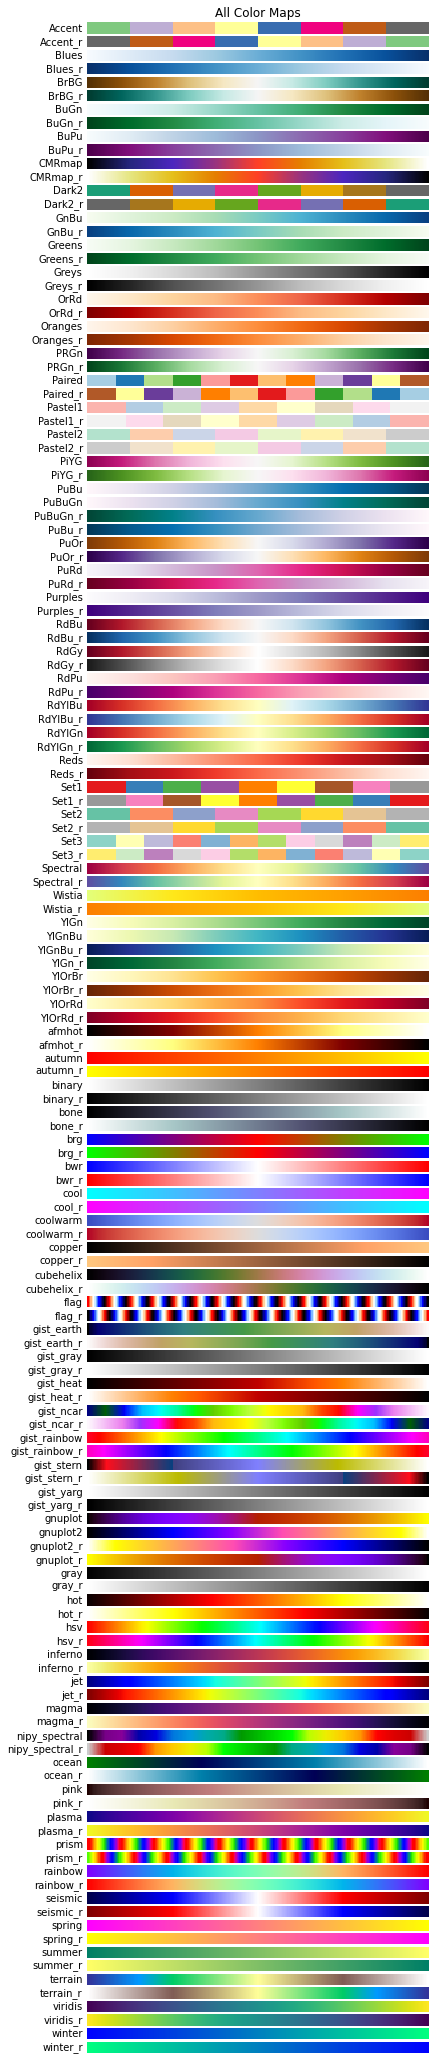

In [25]:
mapping.display_colormaps()

In [26]:
map2 = my_gis.map(location=[29.7, -82.3], zoomlevel=10)

In [27]:
blkgrp_sedf.spatial.plot(map_widget=map2, colors="YlGnBu",
                         col='TOTALPOP', renderer_type='c',
                         method='esriClassifyNaturalBreaks',
                         class_count=7)

True

In [28]:
from ipywidgets import Layout
map2.layout = Layout(height="700px")

In [29]:
map2

MapView(layout=Layout(height='700px'))